In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# read data
cars = pd.read_csv('data/vehicles.csv')
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [235]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
# Drop rows where 'model' is NaN
cars = cars.dropna(subset=['model'])

# Drop rows where 'manufacturer' is NaN
cars = cars.dropna(subset=['manufacturer'])

# Let's clean up undesirable title status
remove_title_status = ['salvage', 'parts_only', 'lien', 'missing','rebuilt']
cars = cars[~cars['title_status'].isin(remove_title_status)]

# Let's remove entries that are parts only.
cars = cars[cars['title_status'] != 'parts_only']

# Let's drop older cars that may be less desirable to customers and could be priced lower than their market value. Also may require more maintenance, repairs, missing safety features, not as fuel efficient and cost money to store on the lot. Let's drop cars that over 30 years old.
cars = cars[cars['year'] >= 1995]

# Price to keep on the lot. Let's drop cars that are priced less than $600, that's $50/month in expenses (at least) to keep and store on the lot. 
cars = cars[cars['price'] >= 600]

# Let's get rid of cars that are priced under $120,000 since we're targeting luxury and exotic cars. 
cars = cars[cars['price'] >= 120000]

# Let's drop recors there manufacturer is Harley-Davidson, as they are motorcycles.  The idea is that luxury cars, motorcyles, have different features and the dealership is specialized in these areas.
cars = cars[cars['manufacturer'] != 'harley-davidson']

# Let's drop cars that have an odometer reading over 250,000 miles, as they may be less desirable to customers and could be priced lower than their market value. After 250,000. It may be time to replace the motor.
cars = cars[cars['odometer'] <= 250000]

In [6]:
cars['title_status'].value_counts()

title_status
clean    189
Name: count, dtype: int64

In [9]:
cars['manufacturer'].value_counts().sort_values(ascending=False).head(10)


manufacturer
mercedes-benz    36
ferrari          28
porsche          26
chevrolet        23
ford             10
audi              9
cadillac          7
ram               7
jeep              6
nissan            4
Name: count, dtype: int64

## Features deemed important to consumers (IMHO)
* region (if they don't want to purchase out of state or pay for shipping/transport fees)
* price 
* year
* manufacturer
* model
* type (if they don't know exactly what they want)
* condition
* fuel
* odometer
* title_status
* paint_color

Drop 
* cylinders
* transmission (the "other" category is an intersting one)
* VIN (to look up accident history, but probably not in this case)
* drive (4wd,rwd, fwd)
* size
* region, state

In [10]:
cars['year'].value_counts().sort_values(ascending=True)

year
2011.0     1
2003.0     1
1995.0     1
2005.0     2
2008.0     2
2013.0     3
2002.0     3
2000.0     3
2010.0     3
2012.0     3
2009.0     4
2007.0     4
1999.0     4
2016.0     6
2006.0     8
2014.0    11
2015.0    11
2019.0    18
2018.0    21
2017.0    21
2020.0    29
2021.0    30
Name: count, dtype: int64

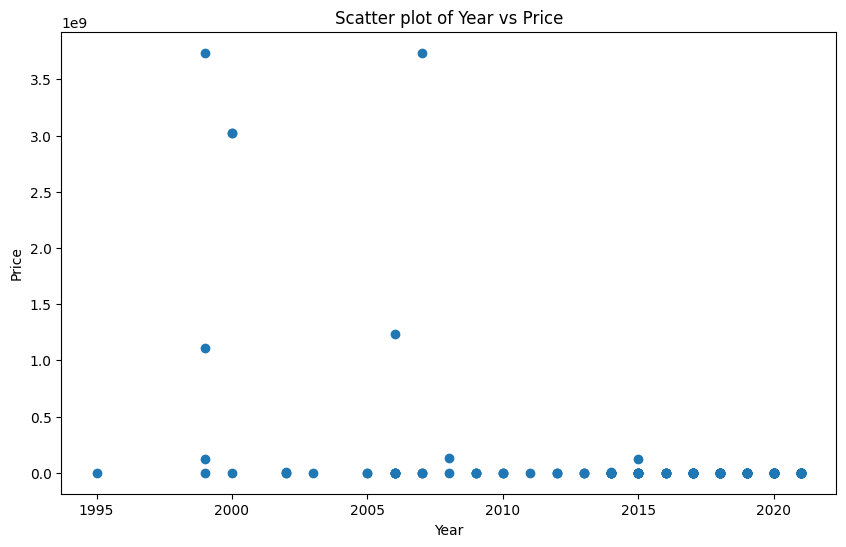

In [12]:
# Let's try some plots before Data cleaning
#sns.scatterplot(data=cars, x='year', y='price')
plt.figure(figsize=(10,6))
plt.scatter(cars['year'], cars['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot of Year vs Price')
plt.show()

In [16]:
cars.query('year < 2000')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
234446,129928,porsche,928,1995.0
213918,1111111,chevrolet,corvette,1999.0
137807,123456789,buick,regal,1999.0
29386,1111111111,ford,f350 super duty lariat,1999.0
356716,3736928711,toyota,4runner,1999.0


In [17]:
cars.select_dtypes(include='number').corr()['price'].sort_values(ascending=False)

price       1.000000
odometer    0.347317
id         -0.238395
year       -0.399535
Name: price, dtype: float64

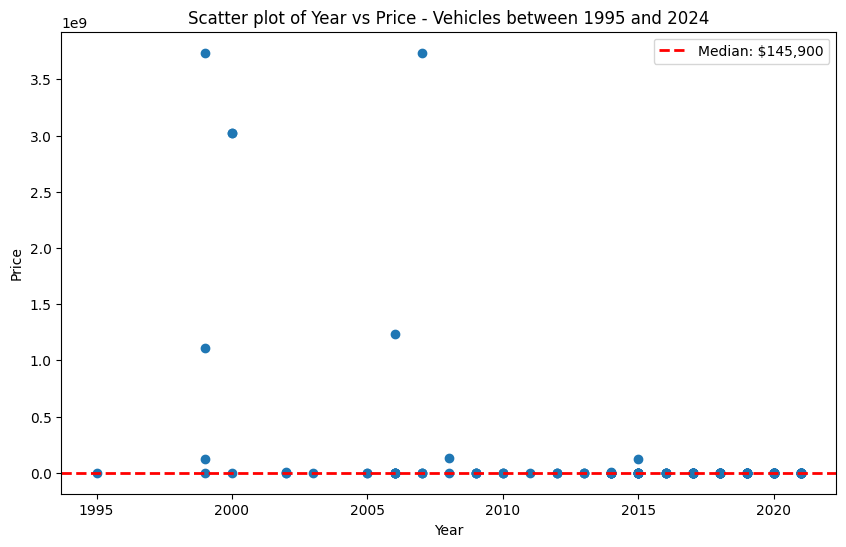

In [18]:
# Let's try to plot again after some data cleaning
#sns.scatterplot(data=cars, x='year', y='price')
median_price = cars['price'].median()

plt.figure(figsize=(10,6))
plt.scatter(cars['year'], cars['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot of Year vs Price - Vehicles between 1995 and 2024')
plt.axhline(y=median_price, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
plt.legend()
plt.savefig('images/price_year_scatter.png')
plt.show()

Ok let's look at price to mileage(odometer). 

In [19]:
# Let's check the odometer values of our current dataset
cars['odometer'].describe()
cars.query('odometer > 250000')[['price','manufacturer','model','year','odometer']].sort_values('odometer')

,price,manufacturer,model,year,odometer


In [ ]:
# No exotic/luxury cars with odometer readings over 250,000 miles in our dataset.  With the highest topping out at 217,000 miles.
# There are some cars with mileage under 50 miles which would be classified as new.
cars['odometer'].sort_values(ascending=False).head(10)

367026    217000.0
300308    215000.0
356716    211000.0
416145    204123.0
153082    200000.0
213918    200000.0
145837    198000.0
131986    185000.0
91502     182415.0
80484     165000.0
Name: odometer, dtype: float64

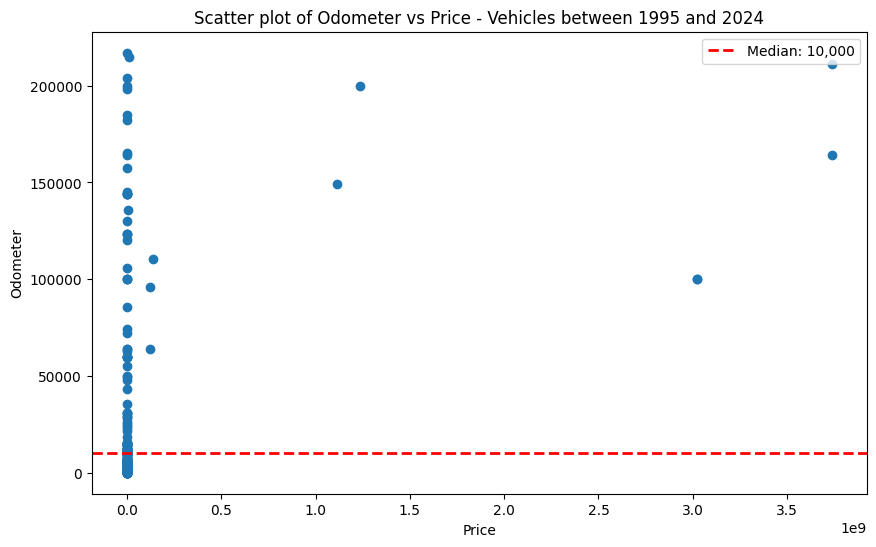

In [29]:
median_mileage = cars['odometer'].median()

plt.figure(figsize=(10,6))
plt.scatter(cars['price'], cars['odometer'])
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title('Scatter plot of Odometer vs Price - Vehicles between 1995 and 2024')
plt.axhline(y=median_mileage, color='red', linestyle='--', linewidth=2, label=f'Median: {median_mileage:,.0f}')
plt.legend()
plt.savefig('images/odometer_price_scatter.png')
plt.show()

In [34]:
cars_numeric = cars.copy()
cars_numeric = cars_numeric[(cars_numeric['price'] != 0) & (cars_numeric['price'] != 1)]
cars_numeric = cars_numeric[(cars_numeric['price'] < 100000)]
cars_numeric['price'].value_counts().sort_values()  

cars_numeric = cars_numeric[cars_numeric['cylinders'] != 'other']
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}
title_status_mapping = {
    'clean': 5,
    'salvage': 4,
    'rebuilt': 3,
    'lien': 2,
    'missing': 1,
    'parts only': 0
}
size_mapping = {
    'full-size': 3,
    'mid-size': 2,
    'compact':  1,
    'sub-compact': 0
}
fuel_mapping = {
    'gas': 3,
    'diesel': 2,
    'electric': 1,
    'hybrid': 0
}
cylinders_mapping = {
    '12 cylinders': 6,
    '10 cylinders': 5,
    '8 cylinders': 4,
    '6 cylinders': 3,
    '5 cylinders': 2,
    '4 cylinders': 1,
    '3 cylinders': 0
}
drive_mapping = {
    '4wd': 2,
    'rwd': 1,
    'fwd': 0
}

cars_numeric['condition'] = cars_numeric['condition'].map(condition_mapping)
cars_numeric['title_status'] = cars_numeric['title_status'].map(title_status_mapping)    
cars_numeric['size'] = cars_numeric['size'].map(size_mapping)
cars_numeric['fuel'] = cars_numeric['fuel'].map(fuel_mapping)
cars_numeric['cylinders'] = cars_numeric['cylinders'].map(cylinders_mapping)
cars_numeric['drive'] = cars_numeric['drive'].map(drive_mapping)
cars_numeric = cars_numeric.select_dtypes(include=np.number)

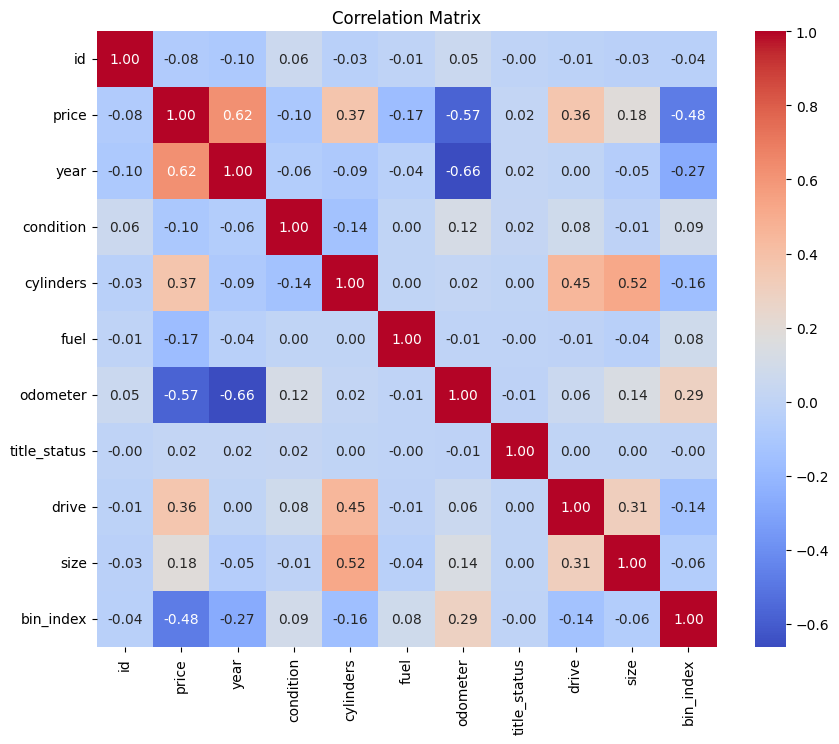

In [364]:
# Correlation matrix
corr = cars_numeric.corr()

    
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt=".2f", cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.savefig('images/correlation_matrix_cleaned.png')
plt.show()

In [175]:
cars.query('price > 125000')[['price','manufacturer','model','year']]

,price,manufacturer,model,year
1727,130000,chevrolet,corvette,2019.0
2922,140000,jeep,renegade,2015.0
5003,145000,NaN,freightliner m2 106,2014.0
7628,145000,NaN,freightliner m2 106,2014.0
11093,129888,rover,defender 110,1993.0
...,...,...,...,...
386256,127333,rover,sport,2020.0
386293,139950,NaN,Mclaren 570GT W/ Upgrades,2014.0
386313,139950,NaN,Mclaren 570GT W Upgrades,2015.0
406741,129999,porsche,911,2014.0


In [37]:
cars['paint_color'].value_counts()

paint_color
white     35
grey      25
black     24
silver    15
blue      12
red       12
yellow     6
custom     4
green      4
orange     3
purple     2
Name: count, dtype: int64

In [38]:
# lets see what the transmission column looks like
cars['condition'].value_counts()

condition
excellent    32
like new     25
good         13
new          11
fair          2
Name: count, dtype: int64

In [39]:
cars.query('transmission == "other"')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
93202,7305853593,daytona beach,199999,2017.0,mercedes-benz,g-class,excellent,8 cylinders,gas,15189.0,clean,other,WDCYC5FF7HX279818,NaN,NaN,wagon,yellow,fl
101811,7302657073,lakeland,204999,2015.0,ferrari,f12berlinetta,excellent,12 cylinders,gas,30920.0,clean,other,ZFF74UFA3F0206272,NaN,mid-size,coupe,red,fl
103460,7305854417,ocala,199999,2017.0,mercedes-benz,g-class,excellent,8 cylinders,gas,15189.0,clean,other,WDCYC5FF7HX279818,NaN,NaN,wagon,yellow,fl
103832,7302645979,ocala,204999,2015.0,ferrari,f12berlinetta,excellent,12 cylinders,gas,30920.0,clean,other,ZFF74UFA3F0206272,NaN,mid-size,coupe,red,fl
114967,7305854456,space coast,199999,2017.0,mercedes-benz,g-class,excellent,8 cylinders,gas,15189.0,clean,other,WDCYC5FF7HX279818,NaN,NaN,wagon,yellow,fl
115569,7302655832,st augustine,204999,2015.0,ferrari,f12berlinetta,excellent,12 cylinders,gas,30920.0,clean,other,ZFF74UFA3F0206272,NaN,mid-size,coupe,red,fl
127596,7316889794,hawaii,225995,2016.0,porsche,911,NaN,6 cylinders,gas,159.0,clean,other,WP0AF2A97GS192995,rwd,NaN,coupe,purple,hi
145798,7308748080,southern illinois,123456,2006.0,jeep,wrangler,excellent,6 cylinders,gas,123456.0,clean,other,NaN,4wd,NaN,NaN,NaN,il
150253,7308732637,evansville,123456,2006.0,jeep,wrangler,excellent,6 cylinders,gas,12345.0,clean,other,NaN,NaN,NaN,NaN,NaN,in
189368,7310169898,south coast,120000,2005.0,ferrari,360 spider,like new,8 cylinders,gas,35498.0,clean,other,ZFFYT53A750139787,rwd,full-size,convertible,red,ma


In [40]:
cars['price'].value_counts().sort_values()

price
195000     1
182000     1
349999     1
347999     1
225995     1
          ..
159991     6
149998     8
120000     9
123456     9
129900    10
Name: count, Length: 101, dtype: int64

In [41]:
cars['size'].value_counts()

size
full-size      28
mid-size       11
compact         4
sub-compact     4
Name: count, dtype: int64

In [42]:
cars['transmission'].value_counts()

transmission
automatic    155
manual        19
other         11
Name: count, dtype: int64